# **Microplane damage model**

In [1]:
%matplotlib widget
from bmcs_matmod.msx import MSX
from bmcs_matmod.ntim import VDNTIM
import matplotlib.pylab as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore');

Choose the damage model with damage governed by equivalent microplane strain 

In [60]:
mpl = MSX(E=34000, mic='dntim', nu=0.18, n_eps=10, eps_max=0.001)
mpl.mic_.trait_set(eps_max=0.001, epsilon_t=0.0003);

In [35]:
mpl.interact()

# How is the stress-strain curve obtained?

The update_plot function runs

In [61]:
from ibvpy.api import XDomainSinglePoint, MATS3DScalarDamage, TStepBC, BCDof
xmodel = XDomainSinglePoint()
m = TStepBC(
    domains=[(xmodel, mpl),],
    bc=[BCDof(
            var='u', dof=0, value=0.001,
        )]
)
m.sim.tline.trait_set(step=0.01)
m.sim.reset()
m.sim.run()

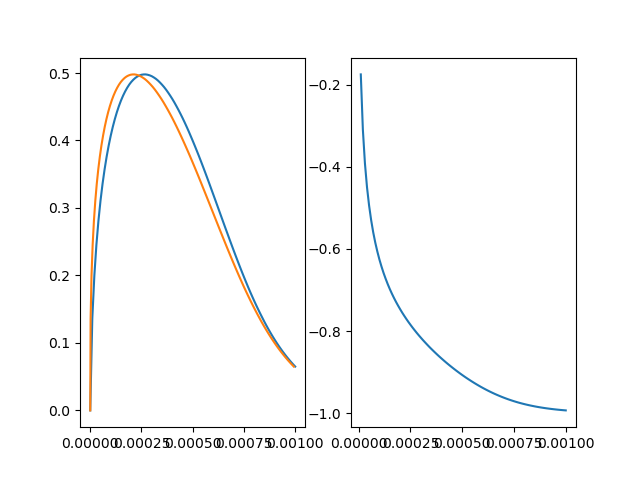

In [62]:
%matplotlib widget
import matplotlib.pylab as plt
_, (ax, ax_nu) = plt.subplots(1,2)
ax.plot(m.hist.U_t[:,0], m.hist.F_t[:,0])
ax.plot(m.hist.U_t[:,2], m.hist.F_t[:,0])
ax_nu.plot(m.hist.U_t[:,0], -m.hist.U_t[:,1] / m.hist.U_t[:,0])